<a href="https://colab.research.google.com/github/gokulmpg/Generative_Z2O/blob/main/Gemini_QSNotek1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install python sdk - google generative AI package

In [2]:
!pip install -q -U google-generativeai

In [3]:
import pathlib

import textwrap

import google.generativeai as genai

from google.colab import userdata  # Store API Key

from IPython.display import Markdown, Code, display

def to_markdown(text):
  text = text.replace('.', ' *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [4]:
import os
os.environ['GOOGLE_API_KEY'] = ''

In [5]:
##  os.getenv('GOOGLE_API_KEY')  for env variable  and GOOGLE_API_KEY = userdata.get['GOOGLE_API_KEY']) for google user data fetch

genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

In [6]:
##LIST MODELS


for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
   print(m.name)


models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-exp-1206
models/gemini-exp-1121
models/gemini-exp-1114
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/learnlm-1.5-pro-experimental


In [7]:
model = genai.GenerativeModel('gemini-pro')

In [8]:
model

genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [9]:
%%time
response = model.generate_content("What is the ikigai?")

CPU times: user 79.4 ms, sys: 12.2 ms, total: 91.6 ms
Wall time: 4.82 s


In [10]:
to_markdown(response.text)

> **Ikigai** (pronounced ee-kee-guy) is a Japanese concept that translates to "a reason for being" or "purpose of life *" It is believed to be the intersection of four main elements:
> 
> * **What you love:** Activities or passions that bring you joy and fulfillment *
> * **What you are good at:** Skills and talents that you possess and enjoy using *
> * **What the world needs:** Problems or challenges that you can contribute to solving *
> * **What you can be rewarded for:** Activities or services that can provide you with financial stability and a sense of accomplishment *
> 
> The overlap of these elements creates a sense of purpose and motivation * Finding your ikigai is believed to lead to a more fulfilling and meaningful life *

In [11]:
response.prompt_feedback

In [12]:
%%time
response = model.generate_content("how to get some one feel bad?")

CPU times: user 40.7 ms, sys: 1.71 ms, total: 42.4 ms
Wall time: 2.43 s


In [13]:
response.prompt_feedback

In [14]:
response.candidates

[index: 0
content {
  parts {
    text: "It is not advisable to intentionally make someone feel bad. It is important to treat others with respect and kindness, regardless of whether or not you agree with them. If you are having a disagreement with someone, it is best to try to resolve it respectfully and calmly."
  }
  role: "model"
}
finish_reason: STOP
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

In [15]:
%%time
response = model.generate_content("How good is gemini AI?")

CPU times: user 87.8 ms, sys: 13.6 ms, total: 101 ms
Wall time: 5.91 s


In [17]:
for chunk in response:
  print(chunk.text)
  print("_ "*80)

Gemini AI is a large multi-modal model, trained by Google. 

**Strengths of Gemini AI:**

* **High accuracy:** Gemini AI achieves state-of-the-art performance on a wide range of natural language processing tasks, including question answering, text summarization, and translation.
* **Few-shot learning:** Gemini AI can learn from only a few examples, making it adaptable to new tasks and domains.
* **Large-scale training:** Gemini AI was trained on a massive dataset of text and code, giving it a deep understanding of language and the world.
* **Generative capabilities:** Gemini AI can generate text, code, and images that are coherent and informative.
* **Efficient inference:** Gemini AI is designed for efficient inference, making it suitable for real-time applications.

**Limitations of Gemini AI:**

* **Bias:** Like other large language models, Gemini AI can inherit biases from its training data.
* **Common sense reasoning:** Gemini AI may struggle with tasks that require common sense re

In [20]:
!curl -o image.jpg https://karmakarkennel.in/wp-content/uploads/2024/08/Bulldog.webp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33194  100 33194    0     0  15268      0  0:00:02  0:00:02 --:--:-- 15275


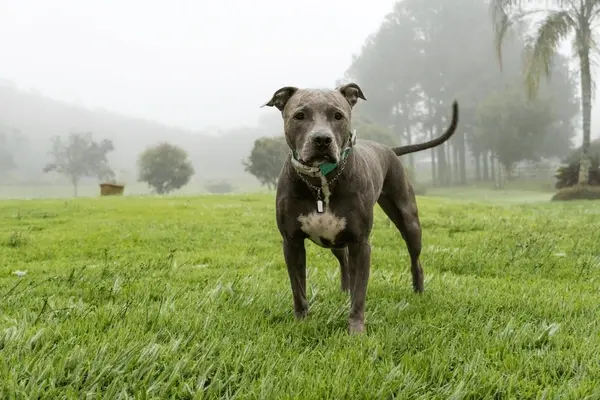

In [21]:
import PIL.Image
img = PIL.Image.open('image.jpg')

img

In [34]:
model = genai.GenerativeModel('gemini-1.5-pro-latest')

In [35]:
response = model.generate_content(img)

to_markdown(response.text)

BadRequest: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-pro-latest:generateContent?%24alt=json%3Benum-encoding%3Dint: Unable to submit request because it must have a text parameter. Add a text parameter and try again. Learn more: https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/gemini